# <span style="color:blue"> INCOME CENSUS DATA CLASSIFICATION WITH GRADIENT BOOSTING ALGORITHMS</span> 


# DATA PREPROCESSING


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 


In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [3]:
data=pd.read_csv("../../Data/adult.csv")
df=data.copy() 
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
df.rename({"education.num":"educational-num","marital.status":"marital-status","sex":"gender","capital.gain":"capital-gain","capital.loss":"capital-loss",
         "hours.per.week":"hours-per-week","native.country":"native-country"},axis=1,inplace=True)

In [5]:
print("Rows : {} \nColumns : {}".format(df.shape[0],df.shape[1]))

Rows : 32561 
Columns : 15


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='income', ylabel='count'>

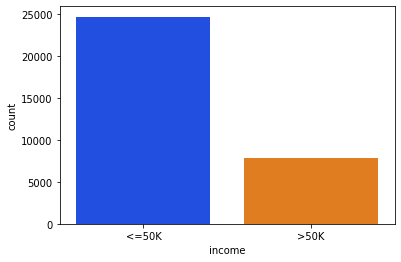

In [6]:
sns.countplot(df["income"],palette="bright")

In [7]:
numeric_describe=df.describe().T 
numeric_describe  

count           mean            std      min       25%  \
age              32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt           32561.0  189778.366512  105549.977697  12285.0  117827.0   
educational-num  32561.0      10.080679       2.572720      1.0       9.0   
capital-gain     32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss     32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week   32561.0      40.437456      12.347429      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178356.0  237051.0  1484705.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [8]:
object_describe=df.describe(include=["object"]).T 
object_describe

count unique                 top   freq
workclass       32561      9             Private  22696
education       32561     16             HS-grad  10501
marital-status  32561      7  Married-civ-spouse  14976
occupation      32561     15      Prof-specialty   4140
relationship    32561      6             Husband  13193
race            32561      5               White  27816
gender          32561      2                Male  21790
native-country  32561     42       United-States  29170
income          32561      2               <=50K  24720

In [9]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- workclass-----
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----- education-----
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
----- marital-status-----
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
----- occupation-----
Prof-special

In [10]:
df.isnull().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
df=df.replace("?",np.nan) 

In [12]:
df.isnull().sum() 

age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [13]:
nan_percentage = df.isna().sum() * 100 / len(df)
missing_percentage_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

column_name  percent_missing
0               age         0.000000
1         workclass         5.638647
2            fnlwgt         0.000000
3         education         0.000000
4   educational-num         0.000000
5    marital-status         0.000000
6        occupation         5.660146
7      relationship         0.000000
8              race         0.000000
9            gender         0.000000
10     capital-gain         0.000000
11     capital-loss         0.000000
12   hours-per-week         0.000000
13   native-country         1.790486
14           income         0.000000

<AxesSubplot:>

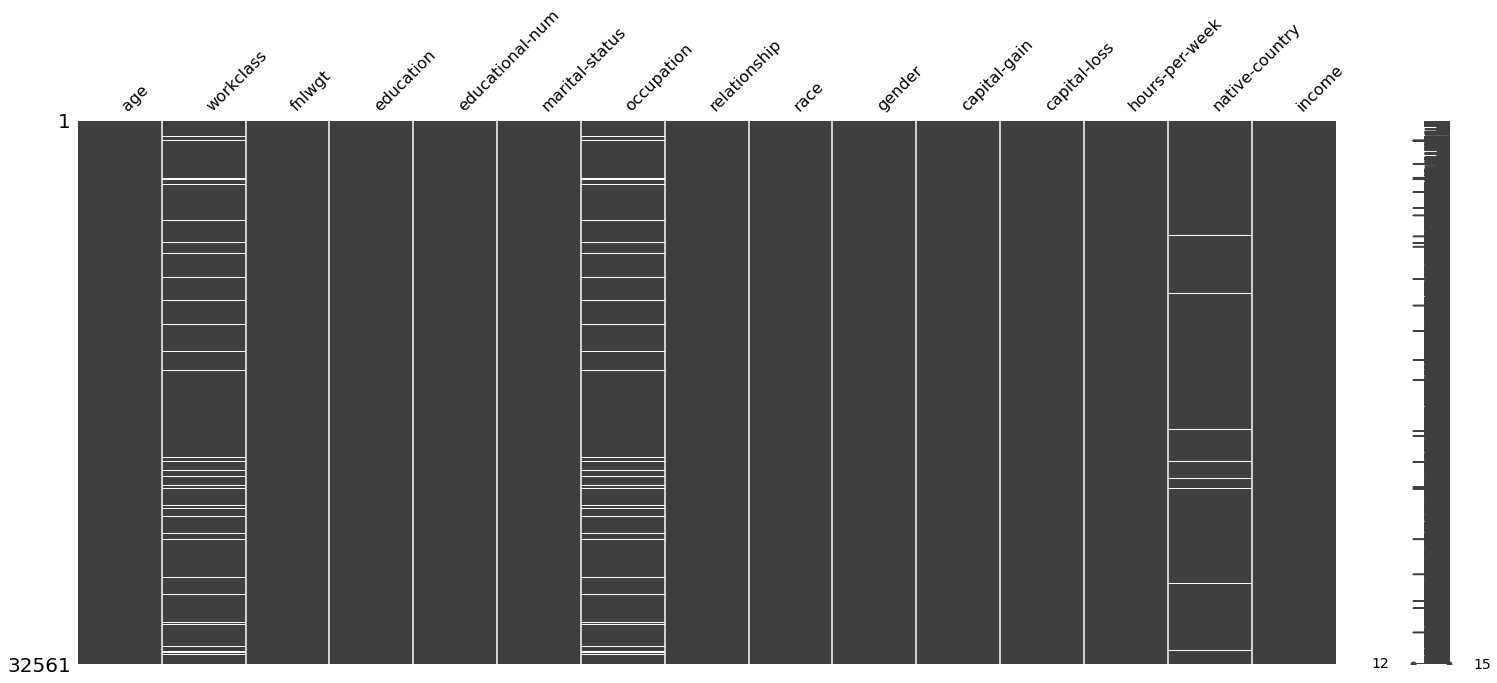

In [14]:
msno.matrix(df) 

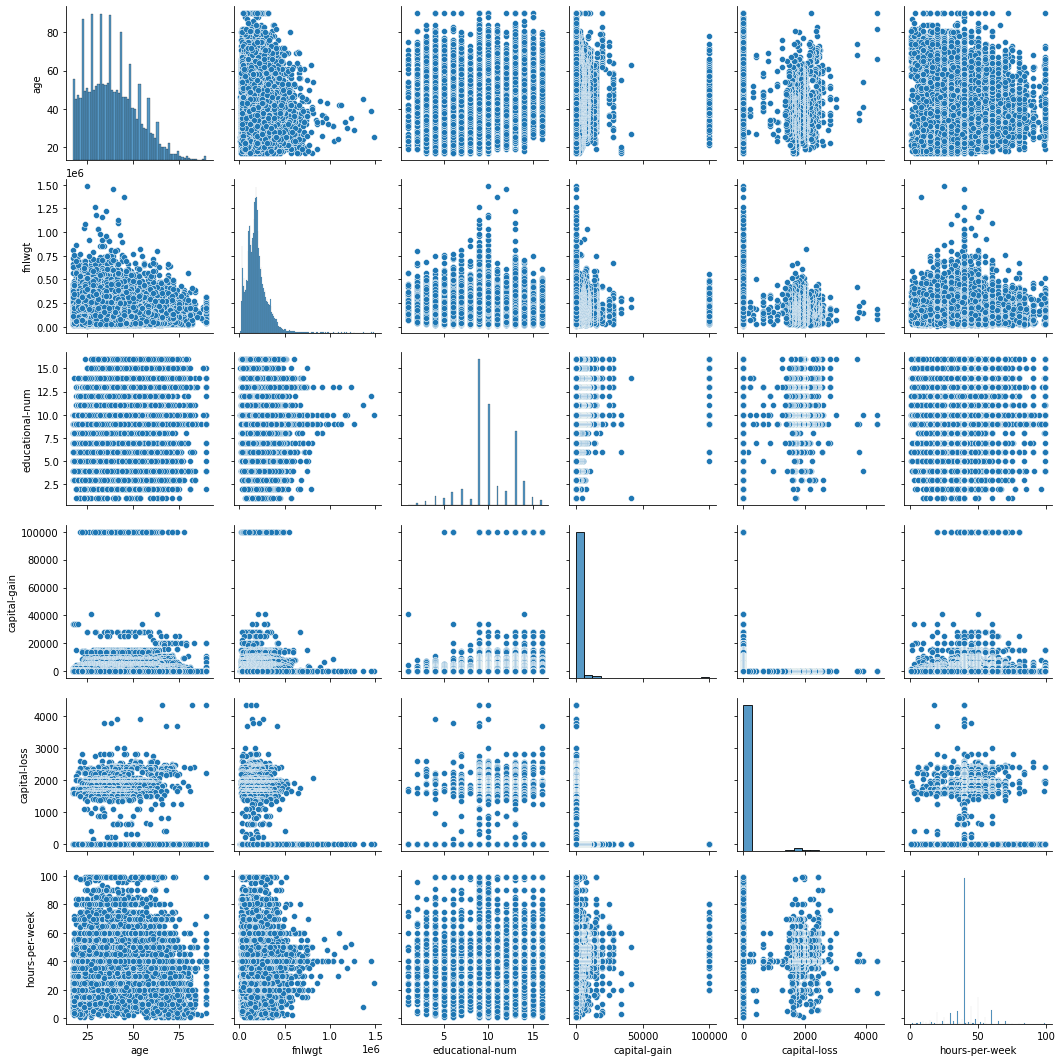

In [15]:
sns.pairplot(df) 

In [16]:
#sns.pairplot(df,hue="income",palette="bright")

In [17]:
df.dtypes 

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [18]:
df["education"].value_counts() 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [19]:
df["educational-num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: educational-num, dtype: int64

In [20]:
df.drop("education",axis=1,inplace=True) 

In [21]:
df.head()

age workclass  fnlwgt  educational-num marital-status         occupation  \
0   90       NaN   77053                9        Widowed                NaN   
1   82   Private  132870                9        Widowed    Exec-managerial   
2   66       NaN  186061               10        Widowed                NaN   
3   54   Private  140359                4       Divorced  Machine-op-inspct   
4   41   Private  264663               10      Separated     Prof-specialty   

    relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White  Female             0          4356              40   
1  Not-in-family  White  Female             0          4356              18   
2      Unmarried  Black  Female             0          4356              40   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4  United-States  <=50K

In [22]:
from pandas.api.types import CategoricalDtype  
df["educational-num"]=df["educational-num"].astype(CategoricalDtype(ordered=True)) 
df["educational-num"].head()

0     9
1     9
2    10
3     4
4    10
Name: educational-num, dtype: category
Categories (16, int64): [1 < 2 < 3 < 4 ... 13 < 14 < 15 < 16]

In [23]:
df["educational-num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: educational-num, dtype: int64

In [24]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
educational-num    category
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
dtype: object

In [25]:
df.head()

age workclass  fnlwgt educational-num marital-status         occupation  \
0   90       NaN   77053               9        Widowed                NaN   
1   82   Private  132870               9        Widowed    Exec-managerial   
2   66       NaN  186061              10        Widowed                NaN   
3   54   Private  140359               4       Divorced  Machine-op-inspct   
4   41   Private  264663              10      Separated     Prof-specialty   

    relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White  Female             0          4356              40   
1  Not-in-family  White  Female             0          4356              18   
2      Unmarried  Black  Female             0          4356              40   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4  United-States  <=50K

In [26]:
df.corr() 

age    fnlwgt  capital-gain  capital-loss  hours-per-week
age             1.000000 -0.076646      0.077674      0.057775        0.068756
fnlwgt         -0.076646  1.000000      0.000432     -0.010252       -0.018768
capital-gain    0.077674  0.000432      1.000000     -0.031615        0.078409
capital-loss    0.057775 -0.010252     -0.031615      1.000000        0.054256
hours-per-week  0.068756 -0.018768      0.078409      0.054256        1.000000

<AxesSubplot:>

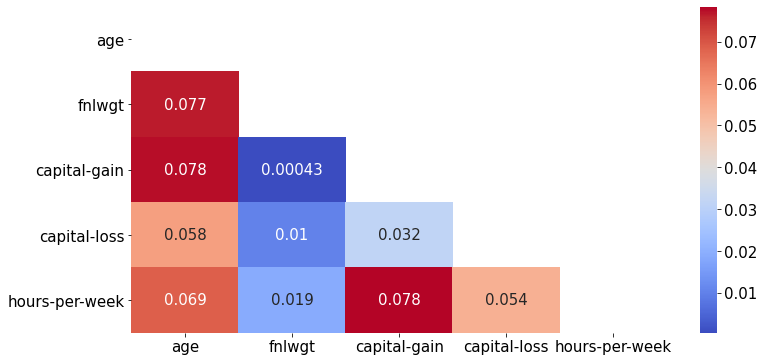

In [27]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


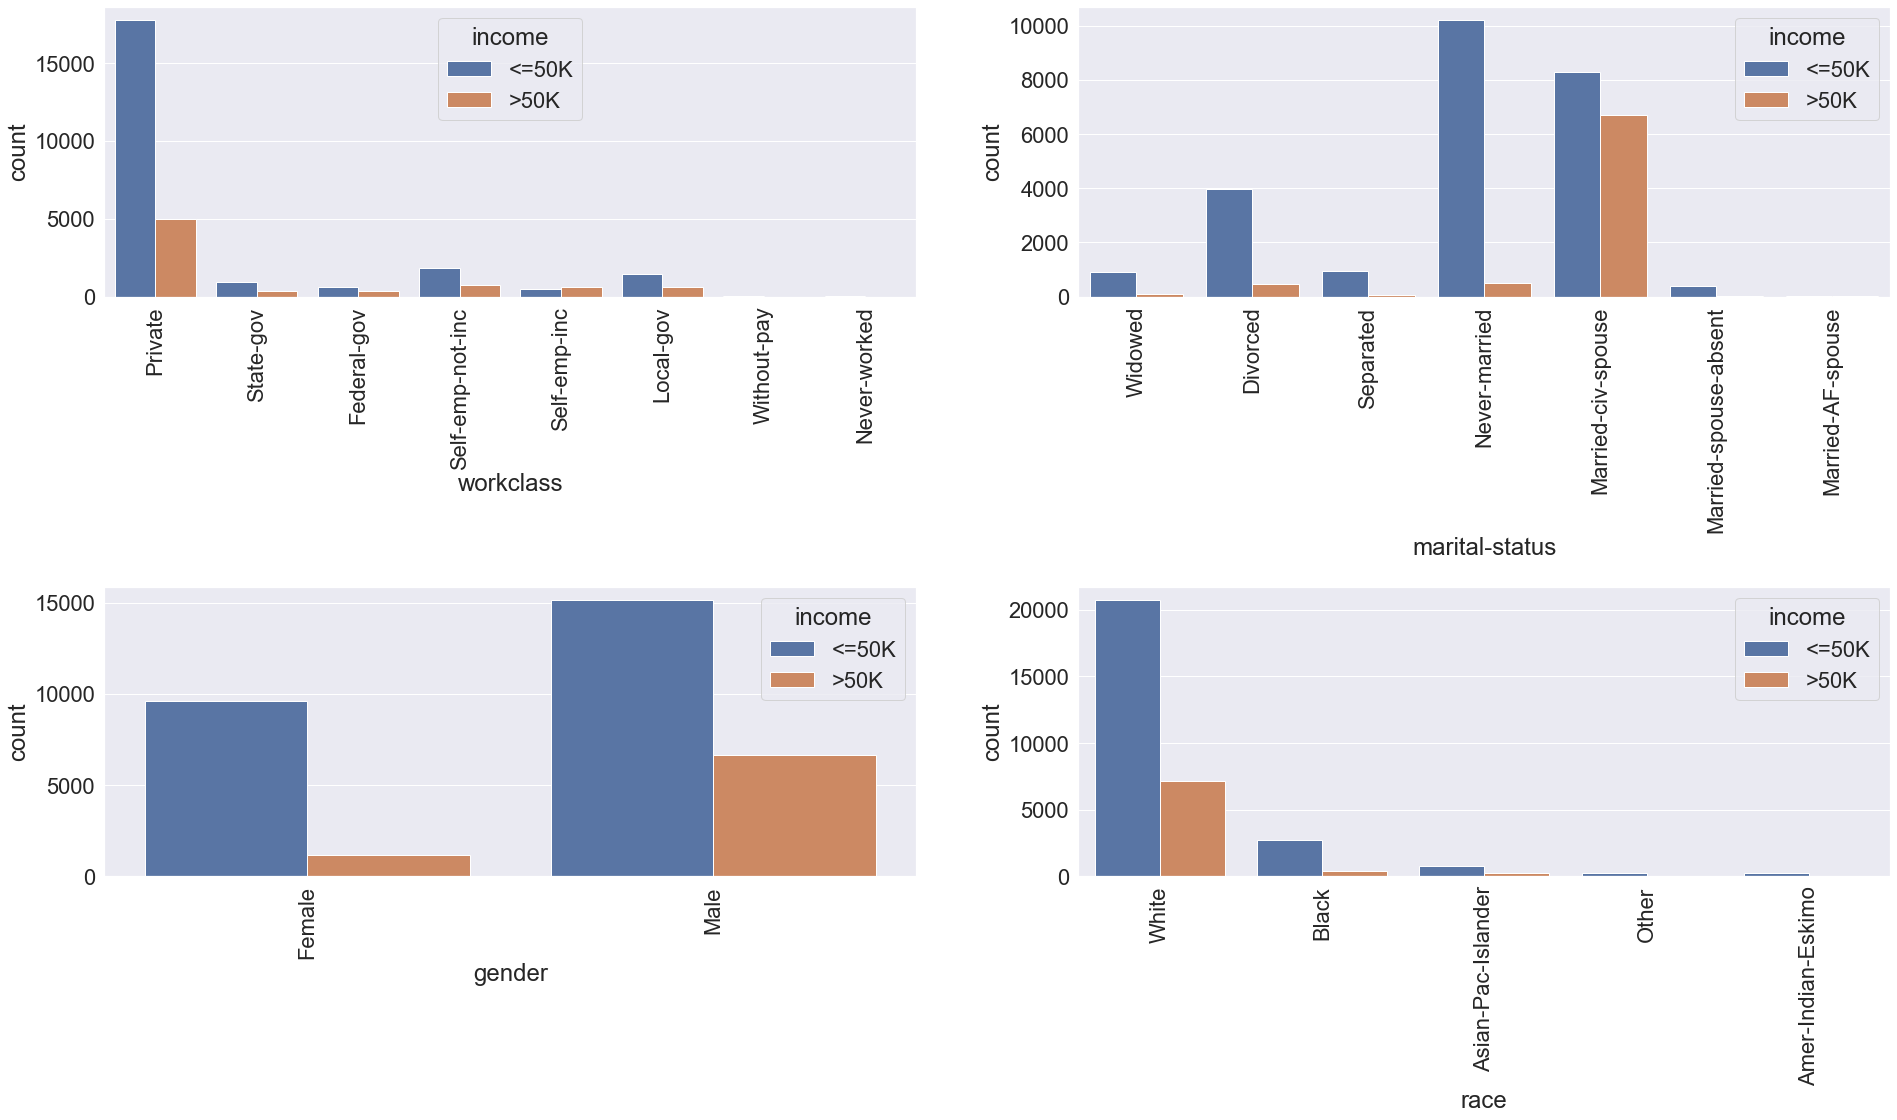

In [28]:
sns.set(font_scale=2)
plt.figure(figsize=(32,16)) 
#plt.rcParams.update({'font.size': 20}) 
plt.subplot(221)
sns.countplot(df["workclass"],hue=df["income"])
plt.xticks(rotation=90) 

plt.subplot(222)
sns.countplot(df["marital-status"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df["gender"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df["race"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) 
plt.show()

## HANDLING WITH OUTLIERS

In [29]:
df.skew() 

age                0.558743
fnlwgt             1.446980
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [30]:
df.kurtosis() 

age                -0.166127
fnlwgt              6.218811
capital-gain      154.799438
capital-loss       20.376802
hours-per-week      2.916687
dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

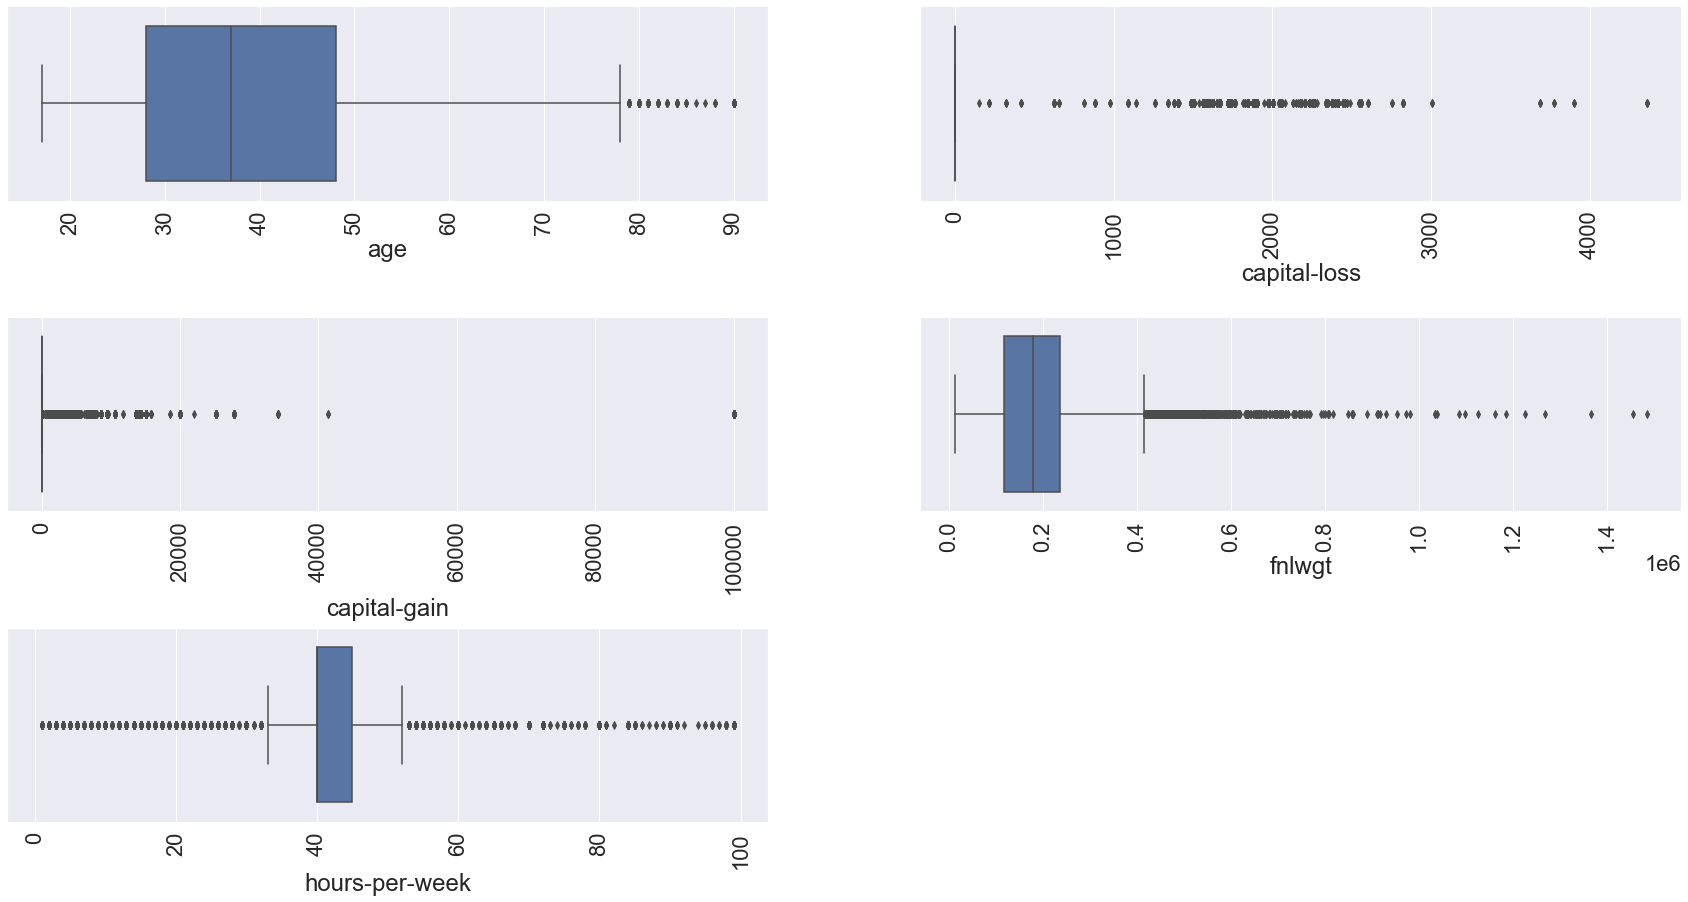

In [31]:

plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 20})
plt.subplot(321)
sns.boxplot(df["age"])
plt.xticks(rotation=90) 

plt.subplot(322)
sns.boxplot(df["capital-loss"])
plt.xticks(rotation=90)

plt.subplot(323)
sns.boxplot(df["capital-gain"])
plt.xticks(rotation=90)

plt.subplot(324)
sns.boxplot(df["fnlwgt"])
plt.xticks(rotation=90)

plt.subplot(325)
sns.boxplot(df["hours-per-week"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.6) 
plt.show()

In [32]:
df_loss_withoutzero=df.loc[df["capital-loss"]!=0,:] 
df_loss_withoutzero.head()

age workclass  fnlwgt educational-num marital-status         occupation  \
0   90       NaN   77053               9        Widowed                NaN   
1   82   Private  132870               9        Widowed    Exec-managerial   
2   66       NaN  186061              10        Widowed                NaN   
3   54   Private  140359               4       Divorced  Machine-op-inspct   
4   41   Private  264663              10      Separated     Prof-specialty   

    relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White  Female             0          4356              40   
1  Not-in-family  White  Female             0          4356              18   
2      Unmarried  Black  Female             0          4356              40   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4  United-States  <=50K

In [33]:
df_gain_withoutzero=df.loc[df["capital-gain"]!=0,:] 
df_gain_withoutzero.head()

age     workclass  fnlwgt educational-num      marital-status  \
1519   54  Self-emp-inc  166459              15  Married-civ-spouse   
1520   52       Private  152234               9  Married-civ-spouse   
1521   53  Self-emp-inc  263925               9  Married-civ-spouse   
1522   52       Private  118025              13  Married-civ-spouse   
1523   46       Private  370119              15  Married-civ-spouse   

           occupation relationship                race gender  capital-gain  \
1519   Prof-specialty      Husband               White   Male         99999   
1520  Exec-managerial      Husband  Asian-Pac-Islander   Male         99999   
1521            Sales      Husband               White   Male         99999   
1522  Exec-managerial      Husband               White   Male         99999   
1523   Prof-specialty      Husband               White   Male         99999   

      capital-loss  hours-per-week native-country income  
1519             0              60  United-States   >50K  
1520             0              40          Japan   >50K  
1521             0              40  United-States   >50K  
1522             0              50  United-States   >50K  
1523             0              60  United-States   >50K

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

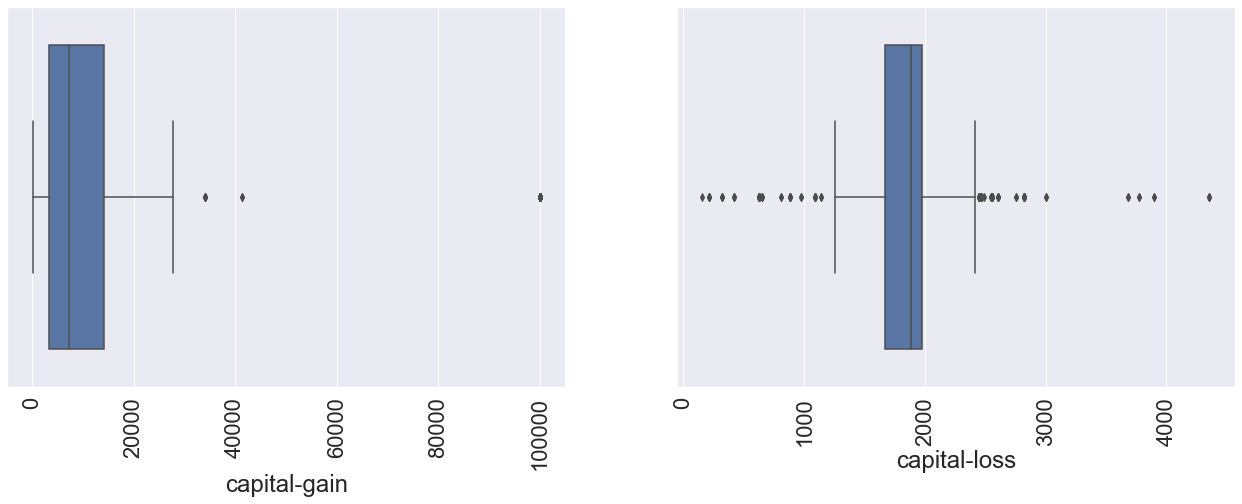

In [34]:

plt.figure(figsize=(22,7))

plt.subplot(121)
sns.boxplot(df_gain_withoutzero["capital-gain"])
plt.xticks(rotation=90) 

plt.subplot(122)
sns.boxplot(df_loss_withoutzero["capital-loss"])
plt.xticks(rotation=90)

In [35]:
numeric_columns=list(df.select_dtypes(include=["int64"]).columns) 
numeric_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

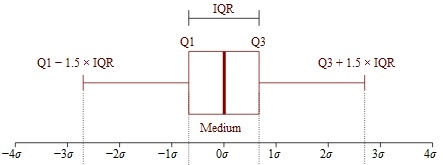


In [36]:
lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(numeric_columns)):
    
    Q1=df[numeric_columns[i]].quantile(0.25) 
    Q3=df[numeric_columns[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

In [37]:
IQR_table=pd.DataFrame({"numeric_columns":numeric_columns,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_table 

numeric_columns  lower_limits  upper_limits  IQR_values
0             age          -2.0          78.0        20.0
1          fnlwgt      -61009.0      415887.0    119224.0
2    capital-gain           0.0           0.0         0.0
3    capital-loss           0.0           0.0         0.0
4  hours-per-week          32.5          52.5         5.0

In [38]:
Q1_loss=df[df["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=df[df["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

print("Capital-Loss Lower Limit :",lower_limit_loss)
print("Capital-Loss Upper Limit :",upper_limit_loss)

Capital-Loss Lower Limit : 1214.5
Capital-Loss Upper Limit : 2434.5


In [39]:
Q1_gain=df[df["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=df[df["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

print("Capital-Gain için Lower Limit :",lower_limit_gain)
print("Capital-Gain için Upper Limit:",upper_limit_gain)

Capital-Gain için Lower Limit : -12598.5
Capital-Gain için Upper Limit: 30093.5


In [40]:
df_loss_withoutzero[(df_loss_withoutzero["capital-loss"]<lower_limit_loss )|( df_loss_withoutzero["capital-loss"]>upper_limit_loss)]["capital-loss"].shape

(107,)

In [41]:
df_gain_withoutzero[(df_gain_withoutzero["capital-gain"]<lower_limit_gain )|( df_gain_withoutzero["capital-gain"]>upper_limit_gain)]["capital-gain"].shape

(166,)

In [42]:
df_gain_withoutzero["capital-gain"].mode()[0] 

15024

In [43]:
df_loss_withoutzero["capital-loss"].mode()[0]

1902

In [44]:
df[((df["capital-gain"]!=0 )& (df["capital-gain"]<lower_limit_gain )) | ((df["capital-gain"]!=0 )& (df["capital-gain"]>upper_limit_gain ))].head()

age     workclass  fnlwgt educational-num      marital-status  \
1519   54  Self-emp-inc  166459              15  Married-civ-spouse   
1520   52       Private  152234               9  Married-civ-spouse   
1521   53  Self-emp-inc  263925               9  Married-civ-spouse   
1522   52       Private  118025              13  Married-civ-spouse   
1523   46       Private  370119              15  Married-civ-spouse   

           occupation relationship                race gender  capital-gain  \
1519   Prof-specialty      Husband               White   Male         99999   
1520  Exec-managerial      Husband  Asian-Pac-Islander   Male         99999   
1521            Sales      Husband               White   Male         99999   
1522  Exec-managerial      Husband               White   Male         99999   
1523   Prof-specialty      Husband               White   Male         99999   

      capital-loss  hours-per-week native-country income  
1519             0              60  United-States   >50K  
1520             0              40          Japan   >50K  
1521             0              40  United-States   >50K  
1522             0              50  United-States   >50K  
1523             0              60  United-States   >50K

In [45]:
outlier_gain=((df["capital-gain"]!=0 )& (df["capital-gain"]<lower_limit_gain )) | ((df["capital-gain"]!=0 )& (df["capital-gain"]>upper_limit_gain ))

In [46]:
outlier_loss=((df["capital-loss"]!=0 )& (df["capital-loss"]<lower_limit_loss)) | ((df["capital-loss"]!=0 )& (df["capital-loss"]>upper_limit_loss ))

In [47]:
df.loc[outlier_gain,"capital-gain"]=df_gain_withoutzero["capital-gain"].mode()[0]

In [48]:
df.loc[outlier_loss,"capital-loss"]=df_loss_withoutzero["capital-loss"].mode()[0]

In [49]:
print("outlier number for age: {}".format(df[(df["age"]<(lower_limits[0]))|(df["age"]>(upper_limits[0]))].shape[0]))

outlier number for age: 143


In [50]:
print("outlier number for hours-per-week : {}".format(df[(df["hours-per-week"]<(lower_limits[4]))|(df["hours-per-week"]>(upper_limits[4]))].shape[0]))

outlier number for hours-per-week : 9008


In [51]:
df.drop(df[df["age"]>upper_limits[0]].index,inplace=True) 

In [52]:
df.head()

age workclass  fnlwgt educational-num marital-status         occupation  \
2   66       NaN  186061              10        Widowed                NaN   
3   54   Private  140359               4       Divorced  Machine-op-inspct   
4   41   Private  264663              10      Separated     Prof-specialty   
5   34   Private  216864               9       Divorced      Other-service   
6   38   Private  150601               6      Separated       Adm-clerical   

  relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
2    Unmarried  Black  Female             0          1902              40   
3    Unmarried  White  Female             0          1902              40   
4    Own-child  White  Female             0          1902              40   
5    Unmarried  White  Female             0          1902              45   
6    Unmarried  White    Male             0          1902              40   

  native-country income  
2  United-States  <=50K  
3  United-States  <=50K  
4  United-States  <=50K  
5  United-States  <=50K  
6  United-States  <=50K

In [53]:
print("Final Weight Outlier Number :{}".format(df[(df["fnlwgt"]<(lower_limits[1]))|(df["fnlwgt"]>(upper_limits[1]))].shape[0]))

Final Weight Outlier Number :991


In [54]:
df.drop(df[df["fnlwgt"]>900000].index,inplace=True) 

In [55]:
numeric_describe

count           mean            std      min       25%  \
age              32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt           32561.0  189778.366512  105549.977697  12285.0  117827.0   
educational-num  32561.0      10.080679       2.572720      1.0       9.0   
capital-gain     32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss     32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week   32561.0      40.437456      12.347429      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178356.0  237051.0  1484705.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [56]:
numeric_describe_2=df.describe().T

<AxesSubplot:>

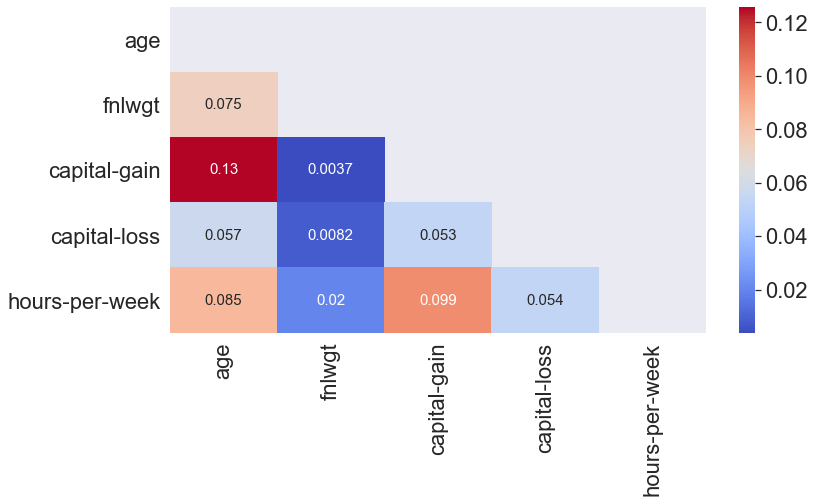

In [57]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

## HANDLING WITH MISSING VALUES

In [58]:
df.isnull().sum() 

age                   0
workclass          1800
fnlwgt                0
educational-num       0
marital-status        0
occupation         1807
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      580
income                0
dtype: int64

<AxesSubplot:>

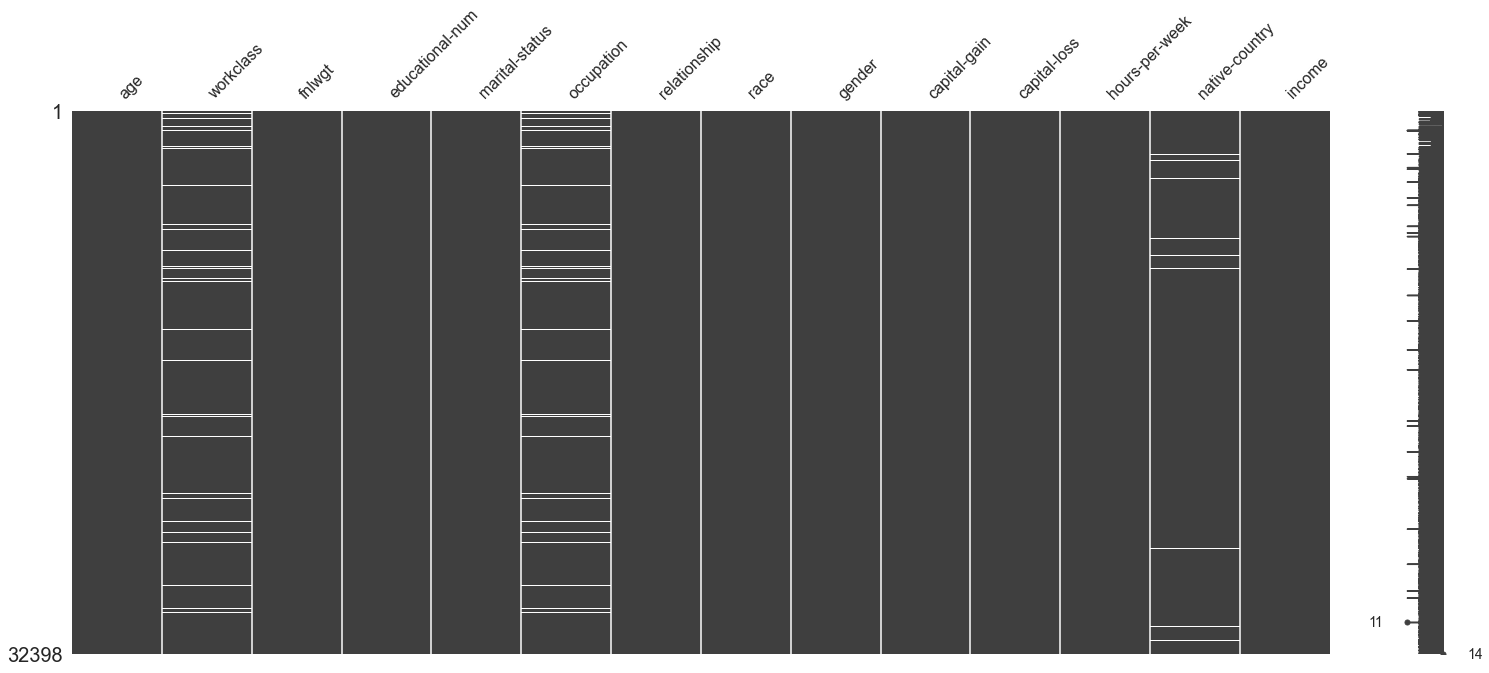

In [59]:
msno.matrix(df)

<AxesSubplot:>

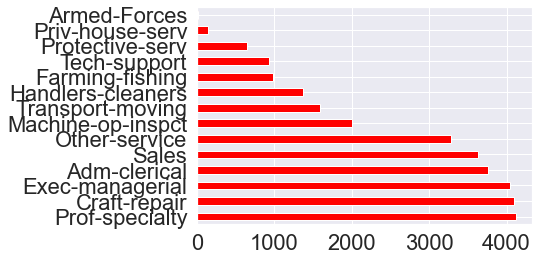

In [60]:
df["occupation"].value_counts().plot.barh(color="red")

<AxesSubplot:>

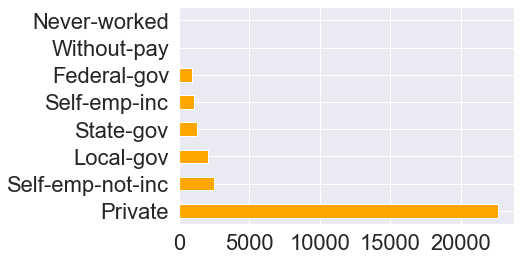

In [61]:
df["workclass"].value_counts().plot.barh(color="orange")

In [62]:
df["native-country"].value_counts()

United-States                 29024
Mexico                          642
Philippines                     197
Germany                         137
Canada                          120
Puerto-Rico                     113
El-Salvador                     105
India                           100
Cuba                             94
England                          89
Jamaica                          81
South                            79
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Columbia                         58
Poland                           57
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [63]:

for i in ["occupation","workclass","native-country"]:
    df[i].fillna(df[i].mode()[0],inplace=True)


In [64]:
df.isnull().sum().sum() 

0

In [65]:
df["occupation"].value_counts()

Prof-specialty       5927
Craft-repair         4093
Exec-managerial      4041
Adm-clerical         3756
Sales                3632
Other-service        3277
Machine-op-inspct    1998
Transport-moving     1593
Handlers-cleaners    1368
Farming-fishing       984
Tech-support          926
Protective-serv       647
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [66]:
df["workclass"].value_counts()

Private             24420
Self-emp-not-inc     2517
Local-gov            2083
State-gov            1295
Self-emp-inc         1105
Federal-gov           957
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [67]:
numeric_describe

count           mean            std      min       25%  \
age              32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt           32561.0  189778.366512  105549.977697  12285.0  117827.0   
educational-num  32561.0      10.080679       2.572720      1.0       9.0   
capital-gain     32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss     32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week   32561.0      40.437456      12.347429      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178356.0  237051.0  1484705.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [68]:
numeric_describe_2

count           mean            std      min       25%  \
age             32398.0      38.384592      13.332532     17.0      28.0   
fnlwgt          32398.0  189341.510062  103056.141558  12285.0  117847.5   
capital-gain    32398.0     655.349898    2693.989598      0.0       0.0   
capital-loss    32398.0      87.256096     397.455240      0.0       0.0   
hours-per-week  32398.0      40.491357      12.297511      1.0      40.0   

                     50%        75%       max  
age                 37.0      47.00      78.0  
fnlwgt          178469.5  236988.75  889965.0  
capital-gain         0.0       0.00   27828.0  
capital-loss         0.0       0.00    2415.0  
hours-per-week      40.0      45.00      99.0

## HANDLING WITH CATEGORICAL DATA

In [69]:
df.head()
df_new=df.copy()

In [70]:
df_new=pd.get_dummies(df_new,columns=["gender","income"],drop_first=True) 

In [71]:
df_new.head()

age workclass  fnlwgt educational-num marital-status         occupation  \
2   66   Private  186061              10        Widowed     Prof-specialty   
3   54   Private  140359               4       Divorced  Machine-op-inspct   
4   41   Private  264663              10      Separated     Prof-specialty   
5   34   Private  216864               9       Divorced      Other-service   
6   38   Private  150601               6      Separated       Adm-clerical   

  relationship   race  capital-gain  capital-loss  hours-per-week  \
2    Unmarried  Black             0          1902              40   
3    Unmarried  White             0          1902              40   
4    Own-child  White             0          1902              40   
5    Unmarried  White             0          1902              45   
6    Unmarried  White             0          1902              40   

  native-country  gender_Male  income_>50K  
2  United-States            0            0  
3  United-States            0            0  
4  United-States            0            0  
5  United-States            0            0  
6  United-States            1            0

In [72]:
df_new.rename({"gender_Male":"gender","income_>50K":"income"},axis=1,inplace=True)


In [73]:
df_new=pd.get_dummies(df_new,columns=["workclass","marital-status","occupation","relationship","race","native-country"])

In [74]:
df_new.head()

age  fnlwgt educational-num  capital-gain  capital-loss  hours-per-week  \
2   66  186061              10             0          1902              40   
3   54  140359               4             0          1902              40   
4   41  264663              10             0          1902              40   
5   34  216864               9             0          1902              45   
6   38  150601               6             0          1902              40   

   gender  income  workclass_Federal-gov  workclass_Local-gov  ...  \
2       0       0                      0                    0  ...   
3       0       0                      0                    0  ...   
4       0       0                      0                    0  ...   
5       0       0                      0                    0  ...   
6       1       0                      0                    0  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
2                        0                           0   
3                        0                           0   
4                        0                           0   
5                        0                           0   
6                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   
5                        0                     0                      0   
6                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
2                        0                               0   
3                        0                               0   
4                        0                               0   
5                        0                               0   
6                        0                               0   

   native-country_United-States  native-country_Vietnam  \
2                             1                       0   
3                             1                       0   
4                             1                       0   
5                             1                       0   
6                             1                       0   

   native-country_Yugoslavia  
2                          0  
3                          0  
4                          0  
5                          0  
6                          0  

[5 rows x 89 columns]

In [75]:
print("New Column Number :",df_new.shape[1])

New Column Number : 89


In [76]:
df_new.columns 


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'gender', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tec

In [77]:
df_new.shape

(32398, 89)

## SPLITTING DATA AS TRAIN AND TEST

In [78]:
from sklearn.model_selection import train_test_split 

In [ ]:
df_new.head()

In [ ]:
df_new["income"].value_counts()

In [ ]:
X=df_new.drop(columns=["income"],axis=1)
X["educational-num"]=X["educational-num"].astype("int") 

In [ ]:
y=df_new["income"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 

In [ ]:
print("X_train row number :",X_train.shape[0])

In [ ]:
print("X_test row number :",X_test.shape[0])

In [ ]:
print("y_train row number :",y_train.shape[0])

In [ ]:
print("y_test row number :",y_test.shape[0])

## GRADIENT BOOSTING MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)

print("GBM  Accuracy Score :",accuracy_score(y_test,y_pred))
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print("GBM  f1 score:",       f1_score(y_test,y_pred))

gbm_train_score=gbm_model.score(X_train,y_train)
gbm_accuracy_score=accuracy_score(y_test,y_pred)
gbm_f1_score=f1_score(y_test,y_pred)
gbm_recall_score=recall_score(y_test,y_pred)
gbm_precision_score=precision_score(y_test,y_pred)

In [ ]:

from pdpbox import pdp, get_dataset, info_plots

features_to_plot = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
inter1  =  pdp.pdp_interact(model=gbm_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [ ]:
import shap
shap.initjs()

In [ ]:
gbm_explainer = shap.TreeExplainer(gbm_model)
gbm_shap_values = gbm_explainer.shap_values(X_test)

In [ ]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values[1,:], X_test.iloc[1,:])

In [ ]:
shap.summary_plot(gbm_shap_values, X_test)

In [ ]:
shap.summary_plot(gbm_shap_values,X_test,  plot_type="bar")

In [ ]:
gbm_recall_score,gbm_precision_score

In [ ]:
gbm_model

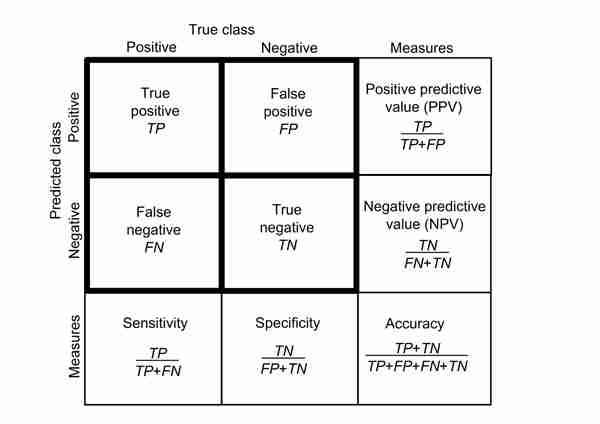

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))




In [ ]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

## XGBOOST MODEL

In [ ]:
 
from xgboost import XGBClassifier

In [ ]:

xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("XGBoost  Accuracy Score :",accuracy_score(y_test,y_pred))
print("XGBoost  Train Score:",xgb_model.score(X_train,y_train))
print("XGBoost  f1 score:",f1_score(y_test,y_pred))

xgb_train_score=xgb_model.score(X_train,y_train)
xgb_accuracy_score=accuracy_score(y_test,y_pred)
xgb_f1_score=f1_score(y_test,y_pred)
xgb_recall_score=recall_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

In [ ]:
xgb_model 

In [ ]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.summary_plot(xgb_shap_values, X_test)

In [ ]:
shap.summary_plot(xgb_shap_values,X_test,  plot_type="bar")

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))



In [ ]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()


## HISTOGRAM BASED BOOSTING MODEL

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=42,)
hgb_model=hgb.fit(X_train,y_train)
y_pred=hgb_model.predict(X_test)
print("Histogram Based Boosting  Accuracy Score:",accuracy_score(y_test,y_pred))
print("Histogram Based Boosting  Train Score:",hgb_model.score(X_train,y_train))
print("Histogram Based Boosting  f1 score:",f1_score(y_test,y_pred))

hgb_train_score=hgb_model.score(X_train,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)
hgb_recall_score=recall_score(y_test,y_pred)
hgb_precision_score=precision_score(y_test,y_pred)

In [ ]:
hgb_model

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))



In [ ]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, hgb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

## LIGHTGBM MODEL

In [ ]:
from lightgbm import LGBMClassifier,plot_importance
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)

print("LightGBM için Accuracy Score:",accuracy_score(y_test,y_pred))
print("LightGBM için Train Score:",lgbm_model.score(X_train,y_train))
print("LightGBM için f1 score:",f1_score(y_test,y_pred))

lgbm_train_score=lgbm_model.score(X_train,y_train)
lgbm_accuracy_score=accuracy_score(y_test,y_pred)
lgbm_f1_score=f1_score(y_test,y_pred)
lgbm_recall_score=recall_score(y_test,y_pred)
lgbm_precision_score=precision_score(y_test,y_pred)

In [ ]:
lgbm_model

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))


In [ ]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC EĞRİSİ')
plt.show()

## COMPARE THE RESULTS

In [ ]:
results=pd.DataFrame({
    "Algorithm":["GBM","XGBoost","HGB","LightGBM"],
    "Accuracy":[gbm_accuracy_score,xgb_accuracy_score,hgb_accuracy_score,lgbm_accuracy_score],
    "Train Score":[gbm_train_score,xgb_train_score,hgb_train_score,lgbm_train_score],
    "f1_Score":[gbm_f1_score,xgb_f1_score,hgb_f1_score,lgbm_f1_score],
     "Recall_Score":[gbm_recall_score,xgb_recall_score,hgb_recall_score,lgbm_recall_score],
      "Precision_Score":[gbm_precision_score,xgb_precision_score,hgb_precision_score,lgbm_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

## UNDERSAMPLING BECAUSE OF UNBALANCED DATA

In [ ]:
random_majority_indices=np.random.choice(df_new[df_new["income"]==0].index,
                                        len(df_new[df_new["income"]==1]),
                                        replace=False)

In [ ]:
minority_class_indices=df_new[df_new["income"]==1].index
print(minority_class_indices)

In [ ]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample=df_new.loc[under_sample_indices]

In [ ]:
X=under_sample.drop(columns=["income"],axis=1)
X["educational-num"]=X["educational-num"].astype("int")
y=under_sample["income"]

In [ ]:
sns.countplot(x="income",data=under_sample)

### GBM MODEL AFTER UNDERSAMPLING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)

print("GBM  Accuracy Score :",accuracy_score(y_test,y_pred))
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print("GBM  f1 score:",       f1_score(y_test,y_pred))

gbm_train_score=gbm_model.score(X_train,y_train)
gbm_accuracy_score=accuracy_score(y_test,y_pred)
gbm_f1_score=f1_score(y_test,y_pred)
gbm_recall_score=recall_score(y_test,y_pred)
gbm_precision_score=precision_score(y_test,y_pred)

### XGBOOST  AFTER UNDERSAMPLING

In [ ]:
xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("XGBoost  Accuracy Score :",accuracy_score(y_test,y_pred))
print("XGBoost  Train Score:",xgb_model.score(X_train,y_train))
print("XGBoost  f1 score:",f1_score(y_test,y_pred))

xgb_train_score=xgb_model.score(X_train,y_train)
xgb_accuracy_score=accuracy_score(y_test,y_pred)
xgb_f1_score=f1_score(y_test,y_pred)
xgb_recall_score=recall_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

In [ ]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.summary_plot(xgb_shap_values, X_test)

In [ ]:
shap.summary_plot(xgb_shap_values,X_test,  plot_type="bar")

In [ ]:
features_to_plot = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
inter1  =  pdp.pdp_interact(model=xgb_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [ ]:
feature_to_plot = 'capital-gain'
pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_test, model_features=X_test.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [ ]:
feature_to_plot = 'capital-loss'
pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_test, model_features=X_test.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

### HGB AFTER UNDERSAMPLING

In [ ]:

hgb=HistGradientBoostingClassifier(random_state=42,)
hgb_model=hgb.fit(X_train,y_train)
y_pred=hgb_model.predict(X_test)
print("Histogram Based Boosting  Accuracy Score:",accuracy_score(y_test,y_pred))
print("Histogram Based Boosting  Train Score:",hgb_model.score(X_train,y_train))
print("Histogram Based Boosting  f1 score:",f1_score(y_test,y_pred))

hgb_train_score=hgb_model.score(X_train,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)
hgb_recall_score=recall_score(y_test,y_pred)
hgb_precision_score=precision_score(y_test,y_pred)

### LGBM AFTER UNDERSAMPLING

In [ ]:
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)

print("LightGBM için Accuracy Score:",accuracy_score(y_test,y_pred))
print("LightGBM için Train Score:",lgbm_model.score(X_train,y_train))
print("LightGBM için f1 score:",f1_score(y_test,y_pred))

lgbm_train_score=lgbm_model.score(X_train,y_train)
lgbm_accuracy_score=accuracy_score(y_test,y_pred)
lgbm_f1_score=f1_score(y_test,y_pred)
lgbm_recall_score=recall_score(y_test,y_pred)
lgbm_precision_score=precision_score(y_test,y_pred)

In [ ]:
lgb_explainer = shap.TreeExplainer(lgbm_model)
lgb_shap_values = lgb_explainer.shap_values(X_test)
shap.summary_plot(lgb_shap_values, X_test)

In [ ]:
features_to_plot = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
inter1  =  pdp.pdp_interact(model=lgbm_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### RESULTS  AFTER  UNDERSAMPLING

In [ ]:
results=pd.DataFrame({
    "Algorithm":["GBM","XGBoost","HGB","LightGBM"],
    "Accuracy":[gbm_accuracy_score,xgb_accuracy_score,hgb_accuracy_score,lgbm_accuracy_score],
    "Train Score":[gbm_train_score,xgb_train_score,hgb_train_score,lgbm_train_score],
    "f1_Score":[gbm_f1_score,xgb_f1_score,hgb_f1_score,lgbm_f1_score],
     "Recall_Score":[gbm_recall_score,xgb_recall_score,hgb_recall_score,lgbm_recall_score],
      "Precision_Score":[gbm_precision_score,xgb_precision_score,hgb_precision_score,lgbm_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

## Fairness

In [79]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [80]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [81]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [82]:
df_new.head()

age  fnlwgt educational-num  capital-gain  capital-loss  hours-per-week  \
2   66  186061              10             0          1902              40   
3   54  140359               4             0          1902              40   
4   41  264663              10             0          1902              40   
5   34  216864               9             0          1902              45   
6   38  150601               6             0          1902              40   

   gender  income  workclass_Federal-gov  workclass_Local-gov  ...  \
2       0       0                      0                    0  ...   
3       0       0                      0                    0  ...   
4       0       0                      0                    0  ...   
5       0       0                      0                    0  ...   
6       1       0                      0                    0  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
2                        0                           0   
3                        0                           0   
4                        0                           0   
5                        0                           0   
6                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   
5                        0                     0                      0   
6                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
2                        0                               0   
3                        0                               0   
4                        0                               0   
5                        0                               0   
6                        0                               0   

   native-country_United-States  native-country_Vietnam  \
2                             1                       0   
3                             1                       0   
4                             1                       0   
5                             1                       0   
6                             1                       0   

   native-country_Yugoslavia  
2                          0  
3                          0  
4                          0  
5                          0  
6                          0  

[5 rows x 89 columns]

In [83]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'gender': 1}]
unprivileged_groups = [{'gender': 0}]
dataset_orig = StandardDataset(df_new,
                                  label_name='income',
                                  protected_attribute_names=['gender'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [84]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.196555


In [85]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = XGBClassifier(seed=42, n_estimators = 1)

mdl = model.fit(X_train, y_train)
with open('../../Results/XGBoost/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/XGBoost/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/XGBoost/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [86]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = XGBClassifier(n_estimators= i)
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [87]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
#print(final_result)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/XGBoost/' + nb_fname + '.csv')
final_result

classifier        T0        T1        T2  \
accuracy                         0.866152  0.850617  0.851852  0.850412   
f1                               0.700023  0.631098  0.637097  0.643453   
statistical_parity_difference   -0.179743 -0.149160 -0.152192 -0.168565   
equal_opportunity_difference    -0.083234 -0.109562 -0.096661 -0.123897   
average_abs_odds_difference      0.073441  0.077928  0.073444  0.093350   
disparate_impact                -1.153900 -1.224252 -1.224338 -1.293965   
theil_index                      0.108189  0.135752  0.133539  0.130169   

                                     T3        T4        T5        T6  \
accuracy                       0.852778  0.855350  0.856790  0.857613   
f1                             0.655596  0.657073  0.660819  0.663096   
statistical_parity_difference -0.178486 -0.173333 -0.172545 -0.177359   
equal_opportunity_difference  -0.124899 -0.134469 -0.132130 -0.152127   
average_abs_odds_difference    0.097699  0.098630  0.096621  0.107544   
disparate_impact              -1.321451 -1.325199 -1.310958 -1.364696   
theil_index                    0.125290  0.125620  0.124393  0.123623   

                                     T7        T8  ...       T90       T91  \
accuracy                       0.857613  0.858230  ...  0.866564  0.866770   
f1                             0.660951  0.663081  ...  0.699838  0.700162   
statistical_parity_difference -0.174779 -0.171336  ... -0.177760 -0.177454   
equal_opportunity_difference  -0.145672 -0.121920  ... -0.083659 -0.083659   
average_abs_odds_difference    0.103737  0.091399  ...  0.072547  0.072325   
disparate_impact              -1.365389 -1.313052  ... -1.148910 -1.147733   
theil_index                    0.124666  0.123888  ...  0.108534  0.108466   

                                    T92       T93       T94       T95  \
accuracy                       0.866049  0.865947  0.865741  0.865638   
f1                             0.699168  0.699007  0.698545  0.698523   
statistical_parity_difference -0.179766 -0.180852 -0.180852 -0.180378   
equal_opportunity_difference  -0.090962 -0.090962 -0.090466 -0.087559   
average_abs_odds_difference    0.076863  0.077546  0.077409  0.075890   
disparate_impact              -1.161824 -1.171270 -1.171270 -1.164162   
theil_index                    0.108625  0.108659  0.108808  0.108761   

                                    T96       T97       T98       T99  
accuracy                       0.865741  0.865844  0.865844  0.866152  
f1                             0.698823  0.699262  0.699262  0.700023  
statistical_parity_difference -0.180531 -0.180990 -0.180523 -0.179743  
equal_opportunity_difference  -0.088055 -0.089048 -0.089048 -0.083234  
average_abs_odds_difference    0.076138  0.076745  0.076459  0.073441  
disparate_impact              -1.164745 -1.166494 -1.162087 -1.153900  
theil_index                    0.108647  0.108452  0.108452  0.108189  

[7 rows x 101 columns]